# Exercise Sheet for Interpolation and Approximation
----------------------------------------------------------

In [1]:
#load some python packages you will need
import numpy as np                 #this helps compute things
import matplotlib.pyplot as plt    #this helps plot things
import scipy as sci
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange


### Enter your student ID number below, this will be used for a reproducable random number seed.

In [2]:
sid = 12136245  #  *** change this to your student number ***
seed = np.random.seed(sid)

----------------------------------------------------------

## Question 1
### a) Compute via interpolation and plot the Lagrange polynomial p(x) to $f(x) = cos(-2\pi x) + 0.4x^2$ over
### $(x_i,y_i) = [(7.2,21.04),(7.4,21.12),(7.6,22.39),(7.8,24.77]$ 


### b) Estimate the maximum absolute error bound for this Lagrange polynomial approximation over $\xi \in [x_0,x_n]$

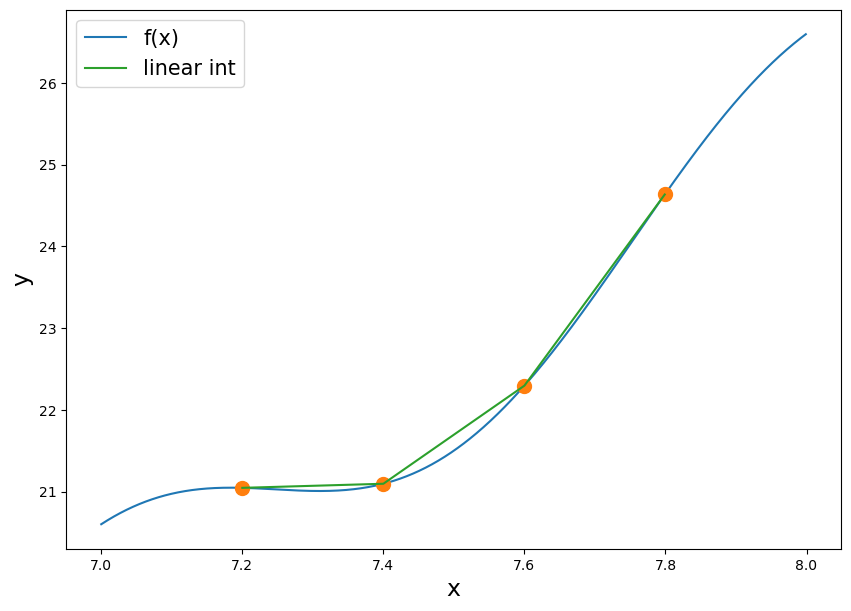

In [3]:
x = np.arange(7,8,0.001)   #dummy range for function
y = np.cos(-2*np.pi*x) +0.4*x**2  #function f(x)

xi = np.array((7.2,7.4,7.6,7.8))   # points for interpolation
yi = y[np.digitize(xi,x)]

x_int = np.arange(7.2,7.8,0.001)
y_int = np.interp(x_int, xi, yi)

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(x,y,label='f(x)')  
ax.plot(xi,yi,'o',markersize=10)
ax.plot(x_int,y_int,label='linear int')  
ax.set_xlabel('x',fontsize=17)
ax.set_ylabel('y',fontsize=17)
ax.legend(loc='best',fontsize=15)

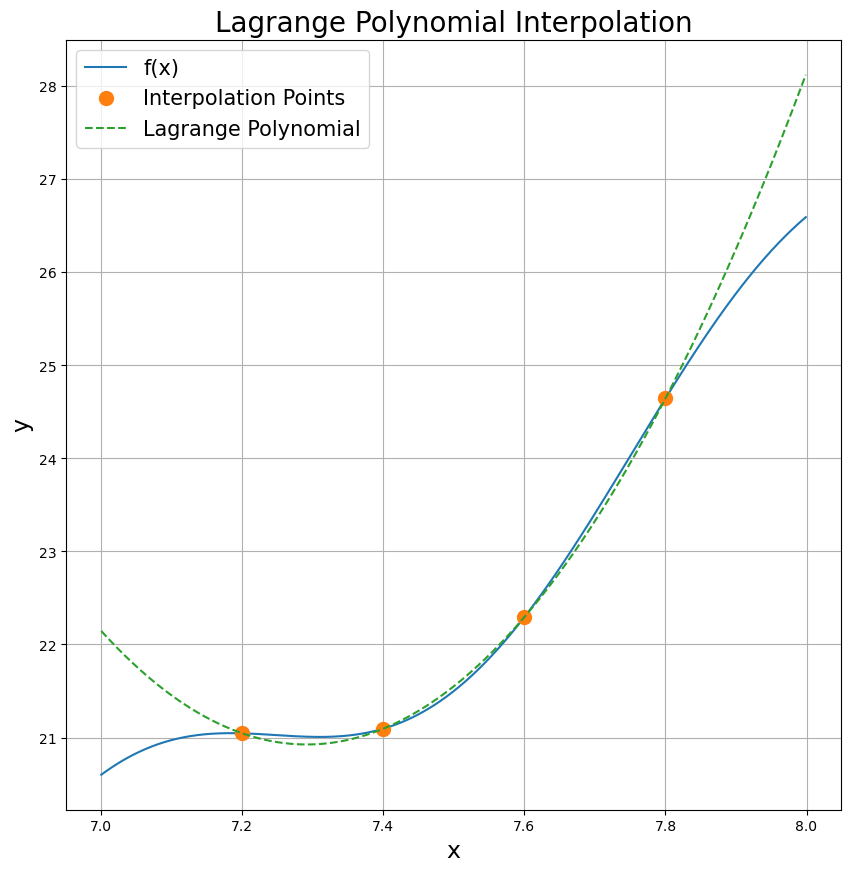

In [4]:
x = np.arange(7,8,0.001)  # Dummy range for function
y1 = np.cos(-2*np.pi*x) +0.4*x**2  # function f(x)

xi = np.array([7.2, 7.4, 7.6, 7.8])  # Points for interpolation
yi = y1[np.digitize(xi,x)]

# lagrange polynomial coeffs
coeffs = np.polyfit(xi, yi, deg=len(xi) - 1) 
p = np.poly1d(coeffs)  

plt.figure(figsize=(10, 10))
plt.plot(x, y1, label='f(x)')
plt.plot(xi, yi, 'o', markersize=10, label='Interpolation Points')  # interpolation points
plt.plot(x, p(x), label='Lagrange Polynomial', linestyle='--')  # Lagrange polynomial

plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.legend(loc='best', fontsize=15)
plt.title('Lagrange Polynomial Interpolation', fontsize=20)
plt.grid(True)
plt.show()


## part b)

In [5]:
x_pts = np.linspace(7.2, 7.8, 1000) #fine grid
f_x_pts = np.cos(-2 * np.pi * x_pts) + 0.4 * x_pts**2 
p_x_pts = p(x_pts) 

abs_errors = np.abs(f_x_pts - p_x_pts)
max_abs_error = np.max(abs_errors)

print(f"Maximum absolute error over [7.2, 7.8]: {max_abs_error:.6f}")

Maximum absolute error over [7.2, 7.8]: 0.084991


----------------------------------------------------------

## Question 2
### Assume linear interpolation with step size $\textbf{d}$ is used to approximate $y(x) = \pi x^7$
### What step size for linear interpolation do you need to have for an absolute error $E_{max} < 10^{-6}$?

<div>
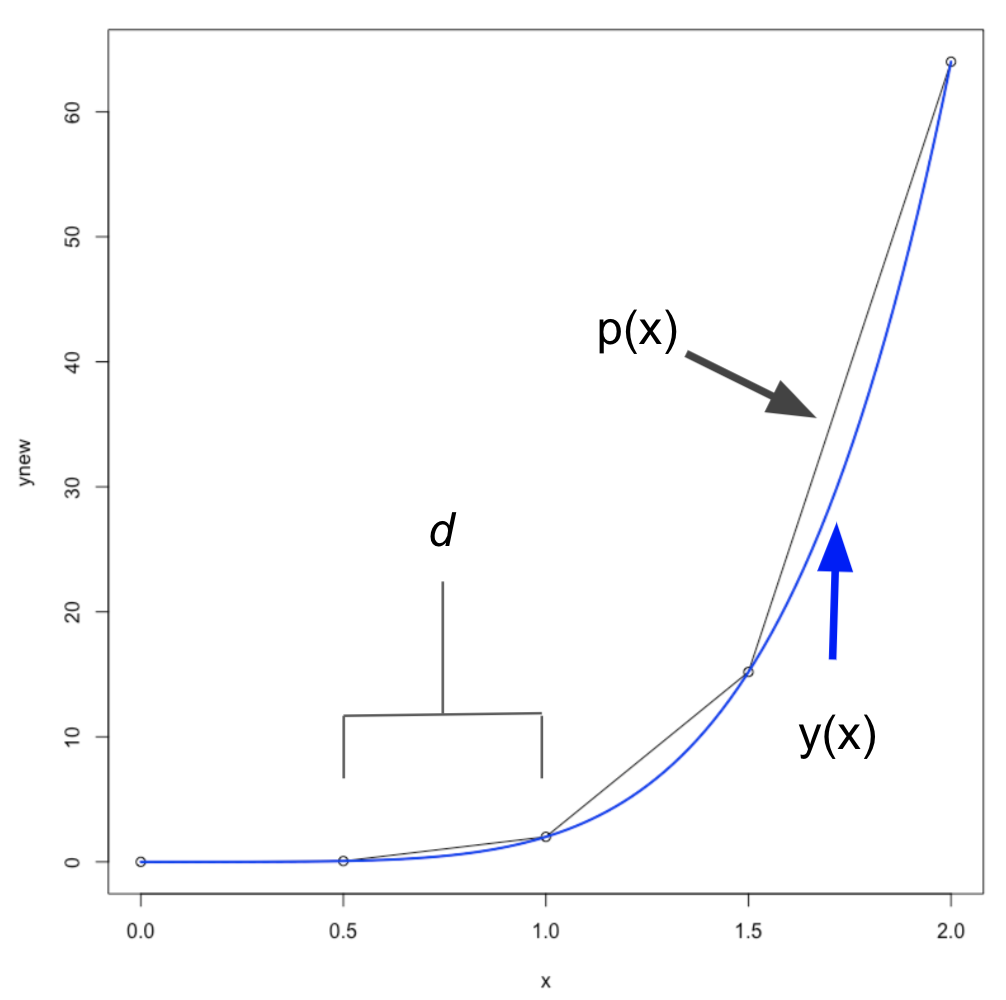
</div>


In [6]:
def y(x):
    return np.pi * x**7

def linear_interpolation_error(d, func, interval, num_points=100000):
    x_nodes = np.arange(0, interval + d, d)
    y_nodes = func(x_nodes)
    
    #fine grid 
    x_fine = np.linspace(0, interval, num_points)
    y_true = func(x_fine)
    y_interp = np.interp(x_fine, x_nodes, y_nodes)
    
    return np.max(np.abs(y_true - y_interp))


def find_min_step(E_max_target, func, interval):
    d = interval #biggest step
    while True:
        error = linear_interpolation_error(d, func, interval)
        if error < E_max_target:
            return d
        d /= 2  # halve the step size and retry

E_max_target = 1e-6
interval = 2

required_step_size = find_min_step(E_max_target, y, interval)
print(f"Required step size for E_max < {E_max_target}: {required_step_size:.6e}")


Required step size for E_max < 1e-06: 3.051758e-05


----------------------------------------------------------

## Question 3
### When using Taylor polynomials to approximate $y = cos(-3 \pi x) + 3x$ over the range $x = [-0.25,0.25]$, about $x= 0$;  to what order $j$ would you need to compute the interpolating polynomial in order to keep the maximum absolute error smaller than $E_{j}(x) < 10^{-6}$?

Text(0, 0.5, 'y')

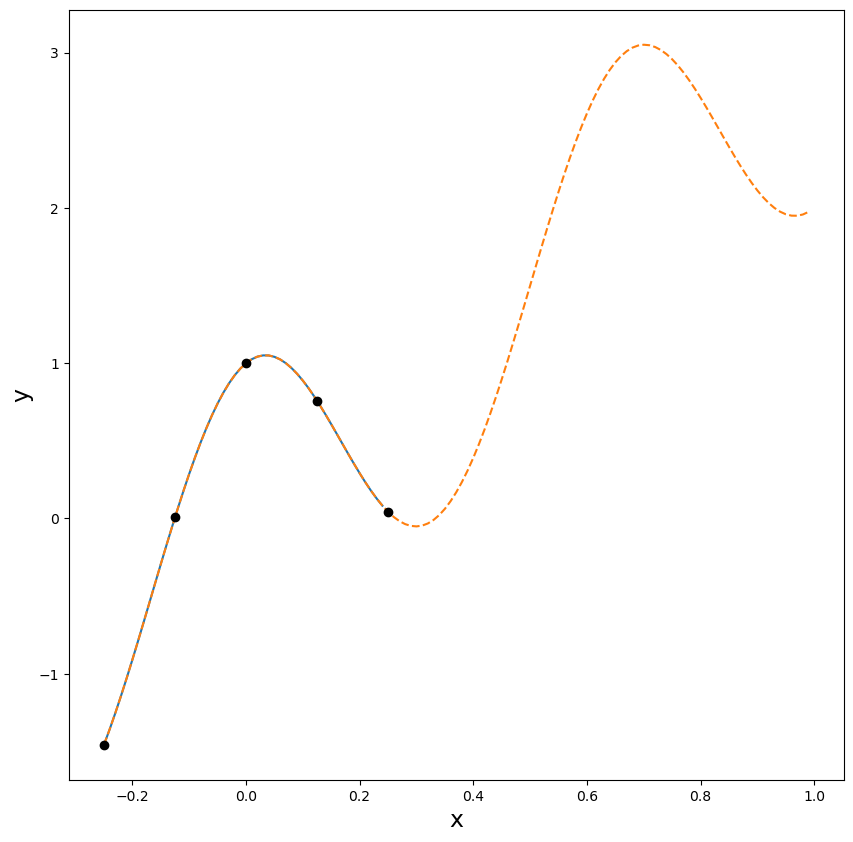

In [7]:
xi = np.arange(-0.25,1,0.01)
xdum = np.arange(-0.25,0.25,0.01)
x = np.array([-0.25,-0.125,0,0.125,0.25])
y2 = np.cos(-3*np.pi*x) + 3*x
ydum = np.cos(-3*np.pi*xdum) + 3*xdum
yi = np.cos(-3*np.pi*xi) + 3*xi
plt.figure(figsize=(10,10))
plt.plot(xdum,ydum)
plt.plot(xi,yi,'--')
plt.plot(x,y2,'o',c='black')
plt.xlabel('x',fontsize=17)
plt.ylabel('y',fontsize=17)

In [10]:
from math import factorial
xi = np.linspace(-0.25, 0.25, 1000)
y_actual = np.cos(3 * np.pi * xi) + 3 * xi

y_taylor = 3 * xi
k = 0 
max_error = np.max(np.abs(y_actual - y_taylor))
j = 1 

# Iterate to find the required order j
while max_error > 1e-6:
    # Compute the k-th term of the cosine Taylor series
    term = ((-1)**k) * (3 * np.pi * xi)**(2 * k) / factorial(2 * k)
    y_taylor += term
    k += 1
    j = 2 * k + 1  # j represents the highest power in the polynomial
    max_error = np.max(np.abs(y_actual - y_taylor))
    if j > 21:  # prevent infinite loops
        print("no luck")
        break

print(f"Required Taylor polynomial order j: {j}")


Required Taylor polynomial order j: 17


----------------------------------------------------------

## Question 4
## Use bilinear interpolation to determine the value of the function $f(x,y) = z$  at the point $(x_r, y_r)$, given the below four data points $x_i, y_i$ with values $z_{i} = f(x_i,y_i)$


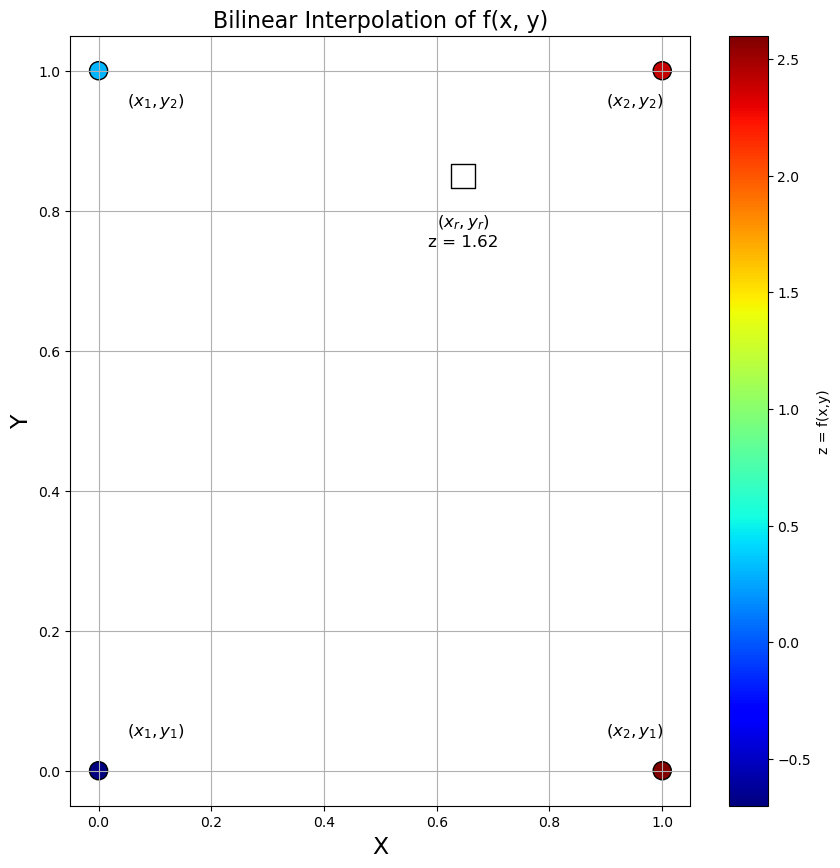

Interpolated value at (x_r, y_r) = (0.647, 0.850) is z = 1.624


In [11]:
#Known data points and function values.  Listed clockwise from the x_1,y_1 = (0,0) point.
xi = np.array([0,0,1,1])  #x_1,x_1,x_2,x_2
yi = np.array([0,1,1,0])  #y_1,y_2,y_2,y_1
zi = np.array([-0.7,0.3,2.4,2.6])  

#Randomly generate coordinates to find function value (z = f(x,y)) at 
xr = np.random.uniform()
yr = np.random.uniform()

z_r = zi[0]*(1 - xr)*(1 - yr) + zi[3]*xr*(1 - yr) + zi[2]*xr*yr + zi[1]*(1 - xr)*yr
    # f(0,0)                    f(1,0)             f(1,1)          f(0,1)
#weighted average based on the relative distances of xrxr​ and yryr​ within the unit square

#Visualize
plt.figure(figsize=(10,10))
scatter = plt.scatter(xi, yi, c=zi, s=170, marker='o', cmap='jet', edgecolor='black')
plt.colorbar(scatter, label='z = f(x,y)')
plt.xlabel('X', fontsize=17)
plt.ylabel('Y', fontsize=17)

# Plot the random point
plt.scatter(xr, yr, edgecolor='black', marker='s', s=290, c='white')
plt.text(0.05, 0.05, '($x_1,y_1)$', fontsize=12)
plt.text(0.05, 0.95, '($x_1,y_2)$', fontsize=12)
plt.text(0.9, 0.95, '($x_2,y_2)$', fontsize=12)
plt.text(0.9, 0.05, '($x_2,y_1)$', fontsize=12)
plt.text(xr, yr - 0.1, f'($x_r,y_r)$\nz = {z_r:.2f}', fontsize=12, ha='center')

plt.title('Bilinear Interpolation of f(x, y)', fontsize=16)
plt.grid(True)
plt.show()
print(f"Interpolated value at (x_r, y_r) = ({xr:.3f}, {yr:.3f}) is z = {z_r:.3f}")

